### Problem:


* `Imagine a telecommunications` provider has segmented its customer base by service usage patterns, categorizing the customers into `four groups`.
* It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.
* The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.
* The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:

1. Basic Service 
2. E-Service
3. Plus Service
4. Total Service

We Need the load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

* 281 Plus Service, 
* 266 Basic-service, 
* 236 Total Service, and 
* 217 E-Service customers

In [4]:
custcat_map = {3:'Plus Service',1:'Basic-service',4:'Total Service',2:'E-Service'}
custcat_map

{3: 'Plus Service', 1: 'Basic-service', 4: 'Total Service', 2: 'E-Service'}

In [5]:
custcat = df['custcat']
custcat

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [6]:
df['customer_category_mapped'] = df['custcat'].map(custcat_map)

In [7]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,customer_category_mapped
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1,Basic-service
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4,Total Service
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3,Plus Service
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1,Basic-service
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3,Plus Service


In [8]:
df['customer_category_mapped'].value_counts()

customer_category_mapped
Plus Service     281
Basic-service    266
Total Service    236
E-Service        217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

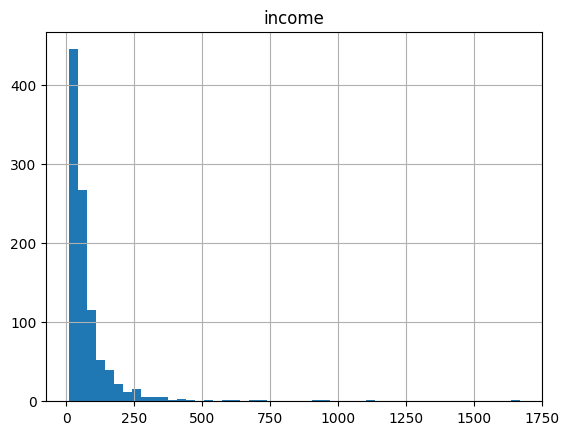

In [9]:
df.hist(column='income', bins=50)

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat',
       'customer_category_mapped'],
      dtype='object')

In [11]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire',
        'gender', 'reside']]  # Feature
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [12]:
y = df['custcat'] # Target
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

In [13]:
import seaborn as sns

### Normalize Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_nor =  StandardScaler().fit_transform(X)
X_nor

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

<Axes: ylabel='Count'>

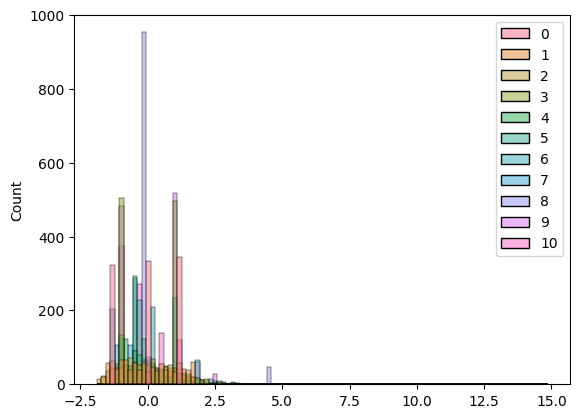

In [20]:
sns.histplot(X_nor)

In [22]:
df.shape

(1000, 13)

In [23]:
X_nor.shape

(1000, 11)

In [24]:
y.shape

(1000,)

<img src='Images/Train_test_split.jpg'/>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Feature = X_nor.copy()
Target  = y.copy()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(Feature,Target,shuffle=True,random_state=123,test_size=0.50)

In [28]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (500, 11) (500,)
Test set: (500, 11) (500,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [31]:
neigh =KNN.fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [32]:
New_data = df.iloc[0]
New_data

region                                  2
tenure                                 13
age                                    44
marital                                 1
address                                 9
income                               64.0
ed                                      4
employ                                  5
retire                                0.0
gender                                  0
reside                                  2
custcat                                 1
customer_category_mapped    Basic-service
Name: 0, dtype: object

In [33]:
New_data_values = New_data.values
New_Customer = New_data_values[0:11]
New_Customer

array([2, 13, 44, 1, 9, 64.0, 4, 5, 0.0, 0, 2], dtype=object)

In [34]:
predication_For_new_customer = neigh.predict([New_Customer])
predication_For_new_customer

array([2], dtype=int64)

In [35]:
custcat_map

{3: 'Plus Service', 1: 'Basic-service', 4: 'Total Service', 2: 'E-Service'}

In [36]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 3, 1, 3, 2], dtype=int64)

In [37]:
y_test

131    1
203    2
50     1
585    3
138    3
      ..
667    2
408    1
468    2
989    3
443    1
Name: custcat, Length: 500, dtype: int64

In [38]:
Compare = pd.DataFrame(X_test,columns=df.columns[0:11])
Compare['Predicated'] = yhat
Compare['Actual_data'] = pd.Series(y_test)
Compare

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,Predicated,Actual_data
0,-0.026968,-1.336167,-0.532482,1.010051,-1.145747,-0.285399,-1.367671,0.298996,-0.222076,-1.034598,1.859834,1,NaN
1,-0.026968,1.286891,1.698143,1.010051,0.738868,1.060513,0.269278,1.589057,-0.222076,-1.034598,-0.230650,3,NaN
2,-0.026968,-0.258840,-0.612147,1.010051,-0.748986,-0.472331,-0.549196,-0.991064,-0.222076,-1.034598,1.859834,1,NaN
3,1.198836,0.396925,0.264170,1.010051,0.738868,0.097812,-1.367671,0.993644,-0.222076,-1.034598,-0.230650,3,NaN
4,1.198836,-0.586722,-1.329134,1.010051,-0.550605,-0.369518,-0.549196,-0.991064,-0.222076,0.966559,0.466178,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.252771,-1.242486,-1.090138,1.010051,-0.352225,-0.462984,0.269278,-0.693358,-0.222076,-1.034598,0.466178,4,NaN
496,1.198836,0.162723,-0.612147,-0.990050,-0.947366,-0.219973,0.269278,-0.594123,-0.222076,-1.034598,-0.927478,2,NaN
497,-1.252771,1.380572,1.379482,1.010051,1.532390,1.116593,1.087753,1.489822,-0.222076,-1.034598,-0.230650,3,NaN
498,-1.252771,0.396925,1.140487,-0.990050,-0.748986,-0.135853,-0.549196,-0.494887,-0.222076,0.966559,-0.927478,2,3.0


### Accuracy evaluation

In [39]:
from sklearn import metrics

In [40]:
train_Set_accueacy = metrics.accuracy_score(y_train,neigh.predict(X_train))
print("Train set Accuracy: ",train_Set_accueacy*100)

Train set Accuracy:  52.2


In [41]:
test_set_accuaracy = metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ",test_set_accuaracy*100)

Test set Accuracy:  31.6


In [42]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.488
Test set Accuracy:  0.36


In [43]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

In [44]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

In [45]:
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [46]:
mean_acc

array([0.318, 0.304, 0.322, 0.332, 0.316, 0.36 , 0.334, 0.348, 0.304])

In [47]:
std_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02057105])

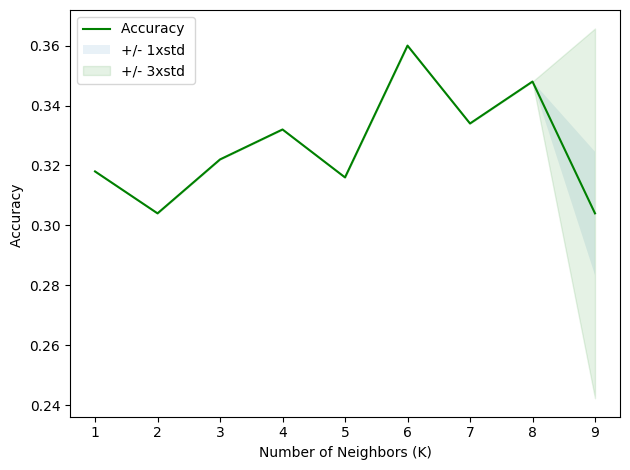

In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [49]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.36 with k= 6


Minimum error:- 0.628 at K = 38


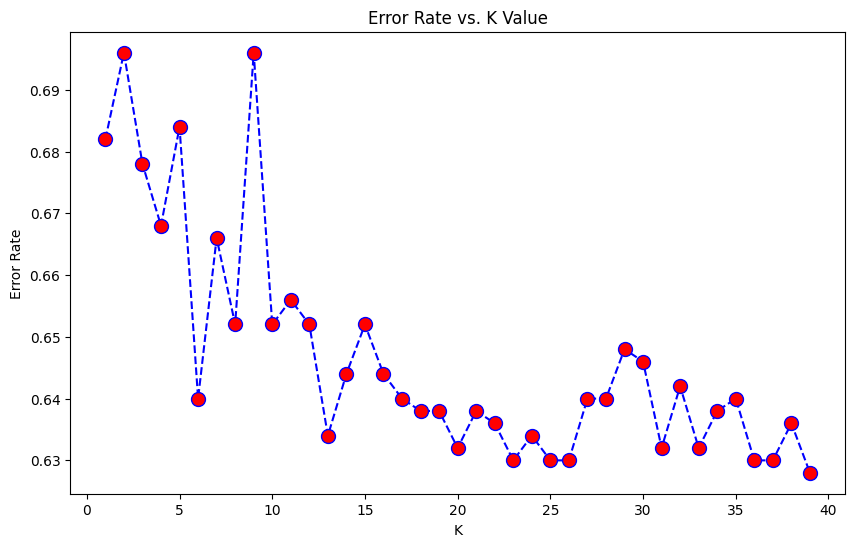

In [50]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))